### Load configs and data to test

In [1]:
import pandas as pd
import numpy as np
import config_param
from predictors import generate_predictors
import shared_utils
from shared_utils.utils import bin_array
import time
import pickle


In [2]:

hosp_cumu_s_org= np.loadtxt('data/hosp_cumu_s.csv', delimiter=',')
#hosp_cumu= pd.read_csv('hosp_cumu.csv')
hosp_dat = pd.read_csv('data/hosp_dat.csv').to_numpy()
popu = np.loadtxt('data/us_states_population_data.txt') #population of each state

### Plot Input Data

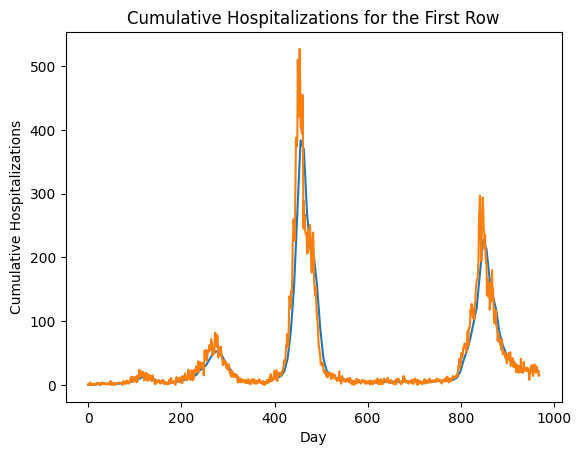

In [3]:
import matplotlib.pyplot as plt
cid  = 2
row = hosp_cumu_s_org[cid, :]
plt.plot(np.diff(row))
plt.plot(hosp_dat[cid, :])
plt.xlabel('Day')
plt.ylabel('Cumulative Hospitalizations')
plt.title('Cumulative Hospitalizations for the First Row')
plt.show()

### Train All Predictors
*Choose how many time points to generate predictors for training*
*Currently specified as week behind*

In [4]:
import gen_predictions
retro_lookback = config_param.retro_lookback
print('retro_lookback:', retro_lookback)
# all_preds = generate_predictors(hosp_cumu_s_org, hosp_dat, popu, config_param, retro_lookback)    

retro_lookback: [ 98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113]


In [8]:
st = time.time()
# all_preds = generate_predictors(hosp_cumu_s_org, hosp_dat, popu, config_param, retro_lookback)    
all_preds, hosp_dat = gen_predictions.generate_all_preds()
et = time.time()
# print(et-st)

Done for lookback 98. Progress: 0.00%
Done for lookback 99. Progress: 0.00%
Done for lookback 100. Progress: 0.00%
Done for lookback 101. Progress: 0.00%
Done for lookback 102. Progress: 0.00%
Done for lookback 103. Progress: 0.00%
Done for lookback 104. Progress: 0.00%
Done for lookback 105. Progress: 0.00%
Done for lookback 106. Progress: 0.00%
Done for lookback 107. Progress: 0.00%
Done for lookback 108. Progress: 0.00%
Done for lookback 109. Progress: 0.00%
Done for lookback 110. Progress: 0.00%
Done for lookback 111. Progress: 0.00%
Done for lookback 112. Progress: 0.00%
Done for lookback 113. Progress: 0.00%


### Plot the predictors

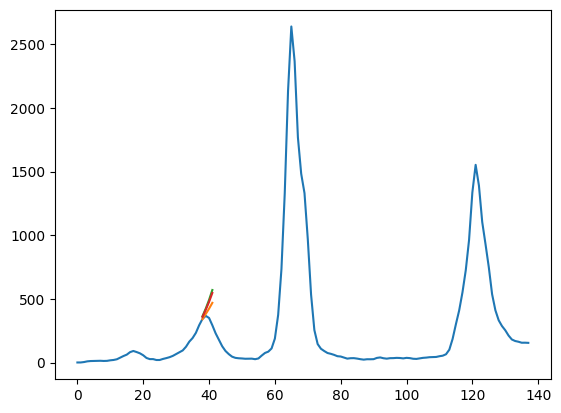

In [10]:
cid = 2
x = 100
import matplotlib.pyplot as plt

maxt = config_param.hosp_dat.shape[1]
plt.plot(bin_array(np.diff(config_param.hosp_cumu_s_org[cid, :]), 0, config_param.bin_size, 0))
pred_start = (maxt - x *config_param.bin_size)
pred_len = all_preds[x].shape[2]
tt = np.arange(pred_start // config_param.bin_size, (pred_start+pred_len)//config_param.bin_size) 

plt.plot(tt, bin_array(np.transpose(all_preds[x][:, cid, :]), 0, config_param.bin_size, 0))
plt.show()

### Train Quantile Random Forest
*Currently configured for 1,..., 5 wk-ahead (5 models)*

In [ ]:

quantiles = config_param.quantiles
preds = gen_predictions.generate_preds(all_preds, hosp_dat)
print(preds)

Column: location, Unique values: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 53 55]
Column: lookback, Unique values: [ 98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113]
Column: train, Unique values: [1]
Error in test_location 52 for test_lookback 105
Error in test_location 54 for test_lookback 105
Error in test_location 52 for test_lookback 104
Error in test_location 54 for test_lookback 104
Error in test_location 52 for test_lookback 103
Error in test_location 54 for test_lookback 103
Error in test_location 52 for test_lookback 102
Error in test_location 54 for test_lookback 102
Error in test_location 52 for test_lookback 101
Error in test_location 54 for test_lookback 101
Error in test_location 52 for test_lookback 100
Error in test_location 54 for test_lookback 100
Error in test_location 52 for test_lookback 99
Error in test_location 54 for test_lookback 9

### Generate predictions for out of sample time-point

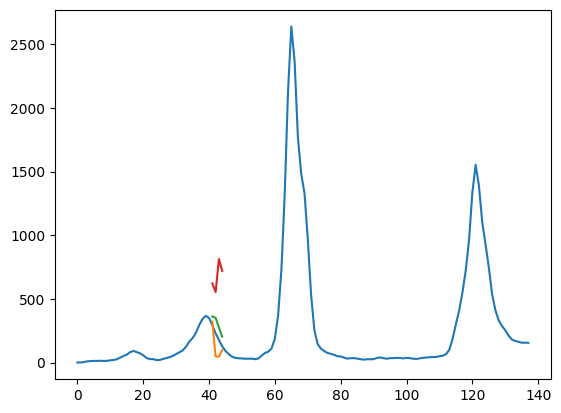

In [13]:
#Here, No need to include plots
test_lookback = retro_lookback[0]

test_location = 2
maxt = hosp_dat.shape[1]
plt.plot(bin_array(np.diff(config_param.hosp_cumu_s_org[cid, :]), 0, config_param.bin_size, 0))
pred_start = (maxt - test_lookback * config_param.bin_size)
tt = np.arange(1+pred_start//config_param.bin_size, pred_start//config_param.bin_size + config_param.weeks_ahead+1)
plt.plot(tt, preds[(test_lookback,test_location)])

In [ ]:
# import pickle
# with open('all_preds.pkl', 'wb') as f:
#     pickle.dump(all_preds, f)